# Create Stunning Fractal Art with Python: A Tutorial For Beginners And Hardcore Math Lovers
## With a single line of code or even less


### Introduction

The phrase "I've never seen anything more beautiful" should only be used for fractals. Sure, there is the Mona Lisa, Van Gokh's paintings (which all have been ruined by AI-generated art, by the way), but I don't think any artist or human, could create anything as royally amazing as fractals. 

On the left, we have the iconic fractal, the Mandelbrot's set, discovered in NNNN when Python or no graphing software was available. 

![](images/opening.gif)

The Mandelbrot's set is a set of complex numbers that when plotted with a few tricks, forms the self-repeating shape we see. Every number in the set can also be a seed to __Julia sets__ and you can see the beauties appearing as I move around the mouse inside boundary of the Mandelbrot's set. 

But before we can plot the Mandelbrot or Julia sets (but, believe me, we will), we have got a quite ground to cover. If you are here just to see the cool pictures, I highly recommend downloading the [open-source Fraqtive software](https://fraqtive.mimec.org/), which I used to generate the above GIF and the one below:

![](images/zoom.gif)

If you just want to plot the Mandelbrot set in Python with a single line of code, here it is (no, the subtitle was not clickbait):

Paste the code block here.

But if you want to go down the beautiful rabbit hole of fractals and learn how to plot them and most importantly, color them appropriately, then read on, possibly for a couple more articles. In this post, we will only learn how to plot a black-white vanilla Mandelbrot using Matplotlib and NumPy. Then, we will take things to a whole new level with Pillow in the future articles.

Let's get started. 

### Complex numbers in Python

Python programmers don't deal with complex numbers on a daily-basis. As we will be working with them a lot in this tutorial, this section will serve as a primer. 

You can create an imaginary part of a complex number by appending the literal _j_ to integers or floats.

In [5]:
num1 = 2 + 1j
num2 = 12.3 + 23.1j

type(num1)

complex

If seeing imaginary numbers represented with _j_ instead of _i_ confuses you (hello, mathematicians), you can use the `complex` built-in function:

In [10]:
2 + 3j == complex(2, 3)

True

Once created, you can access the real and imaginary components of complex numbers with `real` and `imag` attributes:

In [7]:
num1.real

2.0

In [8]:
num2.imag

23.1

Another important property of complex numbers for the purposes of this article is their absolute value. An absolute value or modulus of a complex number is a measure of its distance from the origin (0, 0) in the complex plane. It is defined as the square root of the sum of its real and imaginary parts (thank you, Pythagoras).

In [215]:
abs(1 + 3.14j)

3.295390720385065

These will be enough for us to create some awesome things. Let's get started!

### Simple formula, grand set

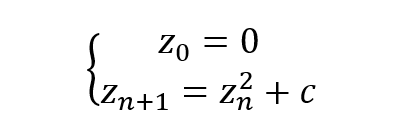

In [27]:
def sequence(c):
    z = 0
    while True:
        yield z
        z = z ** 2 + c

In [32]:
import pandas as pd

df = pd.DataFrame()
df['element'] = [f"z_{i}" for i in range(7)]

cs = [0, 1, -1, 2, 0.25, -.1]

for c in cs:
    zs = list()
    
    for n, z in enumerate(sequence(c)):
        zs.append(z)
        if n == 6: break

    df[f'c={c}'] = zs

In [33]:
df

,element,c=0,c=1,c=-1,c=2,c=0.25,c=-0.1
0,z_0,0,0,0,0,0.000000,0.000000
1,z_1,0,1,-1,2,0.250000,-0.100000
2,z_2,0,2,0,6,0.312500,-0.090000
3,z_3,0,5,-1,38,0.347656,-0.091900
4,z_4,0,26,0,1446,0.370865,-0.091554
5,z_5,0,677,-1,2090918,0.387541,-0.091618
6,z_6,0,458330,0,4371938082726,0.400188,-0.091606


In [76]:
def candidate_values(xmin, xmax, ymin, ymax, pixel_density):
    # Generate a 2D grid of real and imaginary values
    real = np.linspace(xmin, xmax, num=int((xmax-xmin) * pixel_density))
    imag = np.linspace(ymin, ymax, num=int((ymax-ymin) * pixel_density))
    
    xx, yy = np.meshgrid(real, imag)
    
    # Combine the real and imaginary parts into complex numbers
    matrix = xx + 1j * yy
    return matrix

In [77]:
c = candidate_values(-2, 2, -1.5, 1.5, 20)

c.shape

(60, 80)

In [134]:
def in_mandelbrot(c: complex, max_iterations=100):
    z = 0
    
    for _ in range(max_iterations):
        z = z ** 2 + c
        if abs(z) > 2:
            return False
    
    return True

In [135]:
in_mandelbrot(0j)

True

In [136]:
in_mandelbrot(-1 + 0j)

True

In [137]:
in_mandelbrot(2 + 0.1j)

False

In [138]:
in_mandelbrot(1 + 1.2j)

False

In [161]:
c = candidate_values(-2, 0.5, -1.2, 1.2, pixel_density=20)

mandelbrot_mask = np.vectorize(in_mandelbrot)(c, max_iterations=20)
mandelbrot_mask.shape

(48, 50)

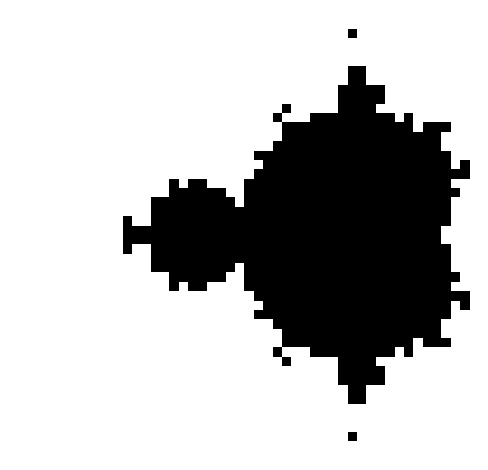

In [164]:
plt.imshow(mandelbrot_mask, cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.savefig("mandelbrot.png", dpi=300)

In [165]:
im = plt.imread("mandelbrot.png")

im.shape

(1440, 1920, 4)

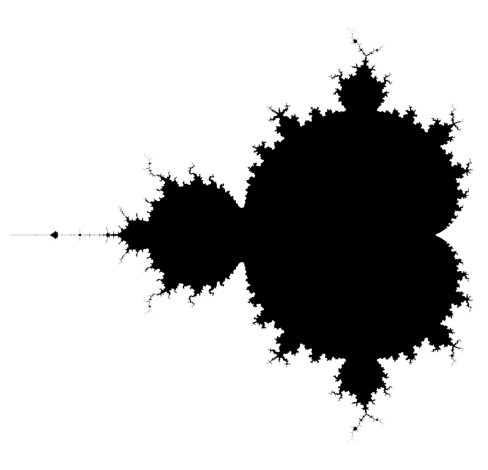

In [170]:
c = candidate_values(-2, 0.5, -1.2, 1.2, pixel_density=1024)

mandelbrot_mask = np.vectorize(in_mandelbrot)(c, max_iterations=20)

plt.imshow(mandelbrot_mask, cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()

In [180]:
from dataclasses import dataclass

@dataclass
class Mandelbrot:
    max_iterations: int
    
    def is_stable(self, c: complex) -> bool:
        z = 0
    
        for _ in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return False

        return True

In [182]:
mandelbrot = Mandelbrot(max_iterations=20)

mandelbrot.is_stable(0.1)

True

In [192]:
mandelbrot.is_stable(1 + 4.4j)

False

In [197]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations

    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations
    
    def is_stable(self, c: complex) -> bool:
        return self.stability(c) == 1

In [200]:
mandelbrot = Mandelbrot(max_iterations=50)

mandelbrot.escape_count(-.1)

50

In [201]:
mandelbrot.stability(-.1)

1.0

In [203]:
mandelbrot.is_stable(-.1)

True

In [205]:
mandelbrot.stability(2)

0.02

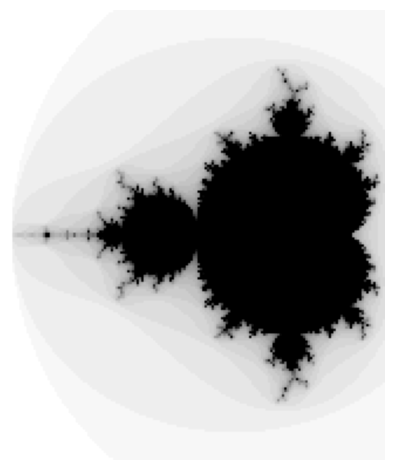

In [212]:
c = candidate_values(-2, 0.5, -1.5, 1.5, pixel_density=64)

mandelbrot = Mandelbrot(max_iterations=30)
image_mandelbrot = np.vectorize(mandelbrot.stability)(c)

plt.imshow(image_mandelbrot, cmap="gray_r")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()

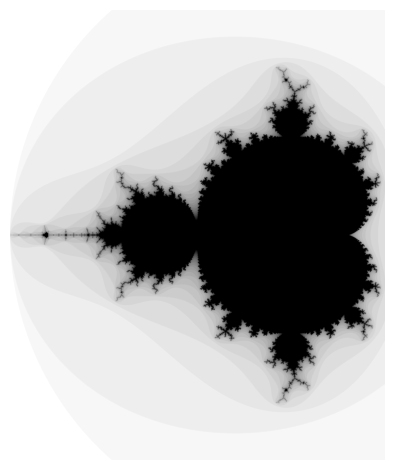

In [214]:
c = candidate_values(-2, 0.5, -1.5, 1.5, pixel_density=2048)

mandelbrot = Mandelbrot(max_iterations=30)
image_mandelbrot = np.vectorize(mandelbrot.stability)(c)

plt.imshow(image_mandelbrot, cmap="gray_r")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()